##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [6]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [7]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data

07/28/2021  11:45 AM    <DIR>          .
07/28/2021  11:45 AM    <DIR>          ..
07/28/2021  11:43 AM    <DIR>          .ipynb_checkpoints
07/28/2021  11:42 AM             6,163 C' v. Z for 1nm thick sample 06-28-2021.png
07/28/2021  11:42 AM             6,179 C' v. Z for varying sample thickness, 06-28-2021.png
07/28/2021  11:42 AM             5,715 Cz v. Z for varying sample thickness, 06-28-2021.png
07/28/2021  11:42 AM    <DIR>          FortranOutputTest
07/28/2021  11:43 AM    <DIR>          PythonOutputTest
07/28/2021  11:45 AM           113,279 Tirmzi_istep4.ipynb
07/28/2021  11:43 AM           113,265 Tirmzi_istep4-Copy2.ipynb
               5 File(s)        244,601 bytes
               5 Dir(s)  142,741,041,152 bytes free


In [8]:
import capsol.newanalyzecapsol as ac

In [9]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [10]:
import glob

In [11]:
folders = glob.glob("PythonOutputTest/*/")
folders


['PythonOutputTest\\Test_1\\']

In [14]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'C-Z.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9, fortran=False)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [15]:
all_data

{'PythonOutputTest\\Test_1\\': {'z': array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19.]),
  'c': array([1.22459938e-14, 1.22452929e-14, 1.22446038e-14, 1.22439249e-14,
         1.22432549e-14, 1.22425929e-14, 1.22419379e-14, 1.22412893e-14,
         1.22406464e-14, 1.22400087e-14, 1.22393758e-14, 1.22387473e-14,
         1.22381228e-14, 1.22375021e-14, 1.22368849e-14, 1.22362709e-14,
         1.22356600e-14, 1.22350520e-14]),
  'cz': array([-7.00889256e-10, -6.95002925e-10, -6.84011689e-10, -6.74432154e-10,
         -6.65998678e-10, -6.58508471e-10, -6.51804062e-10, -6.45761322e-10,
         -6.40281090e-10, -6.35283197e-10, -6.30702131e-10, -6.26483831e-10,
         -6.22583289e-10, -6.18962732e-10, -6.15590219e-10, -6.12438557e-10,
         -6.09484449e-10, -6.08054091e-10]),
  'czz': array([0.00588633, 0.00843878, 0.01028539, 0.00900651, 0.00796184,
         0.00709731, 0.00637357, 0.00576149, 0.00523906, 0.00478948,
         0.

In [16]:
all_data.keys()

dict_keys(['PythonOutputTest\\Test_1\\'])

No handles with labels found to put in legend.


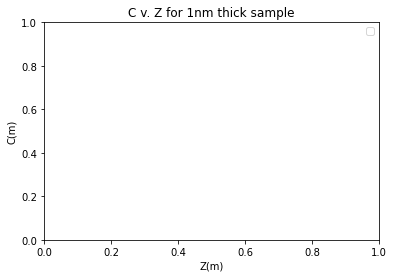

In [17]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

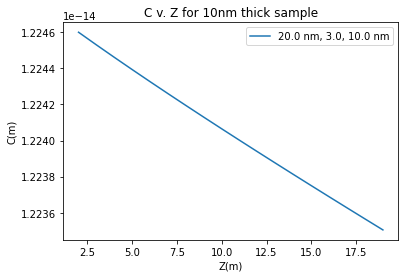

In [18]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 10nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for varying sample thickness, 06-28-2021.png")

No handles with labels found to put in legend.


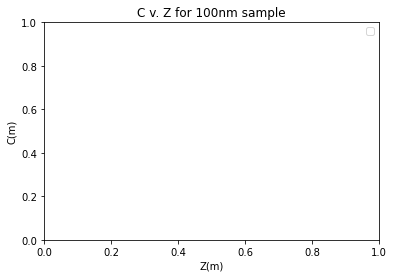

In [19]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 100.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 100nm sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 500.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 500nm sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for varying sample thickness, 06-28-2021.png")

cut off last experiment because capacitance was off the scale

In [ ]:
for params in all_params.values():
    print(params['Thickness_sample'])
    print(params['m-'])

In [ ]:
all_params

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 10.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 100.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 100.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 500.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 500.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
hoepker_data= np.loadtxt("Default Dataset (2).csv" , delimiter= ",")
hoepker_data

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
params

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 10.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 100.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 100.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 500.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 500.0 nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Alpha vs. Z for 10.0 nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 100.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Alpha vs. Z for 100.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 500.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Alpha vs. Z for 500.0nm')
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
data

In [ ]:
from scipy.optimize import curve_fit


In [ ]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [ ]:
all_data.keys()

In [ ]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)